# GTZAN Music Clustering - Data Exploration

This notebook explores the GTZAN dataset and generated features.


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# Add src to path
sys.path.append('../src')

from config import Config

# Configure plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline


In [ ]:
import os
os.chdir('/')  # Set correct working directory

## Load Configuration and Metadata


In [3]:
config = Config()

# Load metadata
metadata_path = config.metadata_path
if os.path.exists(metadata_path):
    df = pd.read_csv(metadata_path)
    print(f"Loaded {len(df)} clips")
    display(df.head())
else:
    print(f"Metadata not found: {metadata_path}")
    print("Run: python src/preprocess.py")


Loaded 2997 clips


,clip_id,genre,genre_id,track_path,track_name,clip_path,start_sec,end_sec,duration_sec,segment_idx,track_idx,lyrics_text,lyrics_status,split
0,blues_000_0,blues,0,/Users/ashfaquesami/425_project/data/raw_gtzan...,blues.00000,/Users/ashfaquesami/425_project/data/clips_10s...,0.0,10.0,10.0,0,0,NaN,pending,train
1,blues_000_1,blues,0,/Users/ashfaquesami/425_project/data/raw_gtzan...,blues.00000,/Users/ashfaquesami/425_project/data/clips_10s...,10.0,20.0,10.0,1,0,NaN,pending,train
2,blues_000_2,blues,0,/Users/ashfaquesami/425_project/data/raw_gtzan...,blues.00000,/Users/ashfaquesami/425_project/data/clips_10s...,20.0,30.0,10.0,2,0,NaN,pending,train
3,blues_001_0,blues,0,/Users/ashfaquesami/425_project/data/raw_gtzan...,blues.00001,/Users/ashfaquesami/425_project/data/clips_10s...,0.0,10.0,10.0,0,1,NaN,pending,test
4,blues_001_1,blues,0,/Users/ashfaquesami/425_project/data/raw_gtzan...,blues.00001,/Users/ashfaquesami/425_project/data/clips_10s...,10.0,20.0,10.0,1,1,NaN,pending,test


## Dataset Statistics



Genre distribution:
genre
blues        300
classical    300
country      300
disco        300
hiphop       300
metal        300
pop          300
reggae       300
rock         300
jazz         297
Name: count, dtype: int64


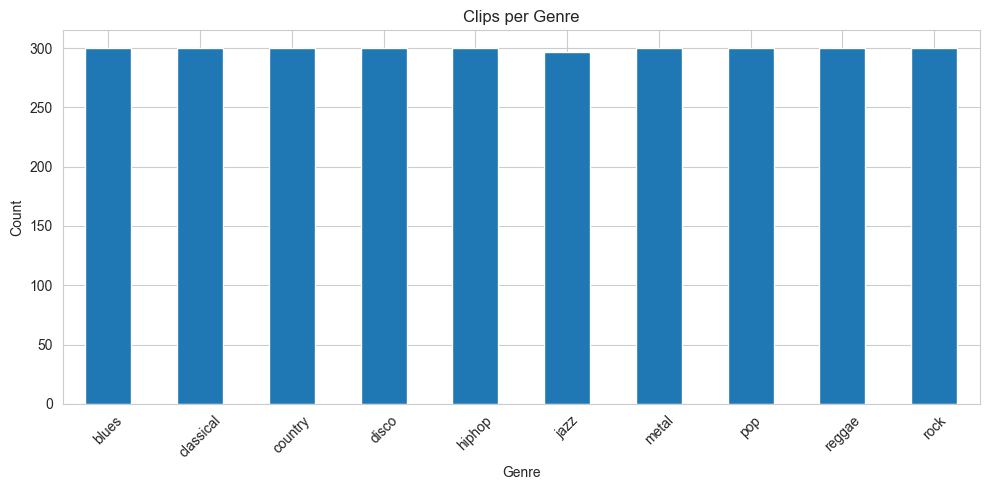

In [4]:
# Genre distribution
if 'df' in locals():
    print("\nGenre distribution:")
    print(df['genre'].value_counts())
    
    # Plot genre distribution
    plt.figure(figsize=(10, 5))
    df['genre'].value_counts().sort_index().plot(kind='bar')
    plt.title('Clips per Genre')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
